# PSTR

本文介绍面板平滑转换模型 (PSTR) 的基本概念、模型设定、估计和检验方法，并通过 Python 实现 PSTR 模型的估计和检验。

## 模型设定

PSTR 模型的基本形式如下：

$$
y_{it} = \alpha_i + \beta_0 x_{it} + \beta_1 x_{it} g(q_{it}; \gamma, c) + \epsilon_{it}
$$

其中，$y_{it}$ 是被解释变量，$x_{it}$ 是解释变量，$g(q_{it}; \gamma, c)$ 是平滑转换函数，$\alpha_i$ 是个体效应，$\beta_0$ 和 $\beta_1$ 是参数，$\epsilon_{it}$ 是误差项。

平滑转换函数的设定如下：

$$
g(q_{it}; \gamma, c) = \frac{1}{1 + e^{-\gamma (q_{it} - c)}}
$$

其中，$q_{it}$ 是平滑转换变量，$\gamma$ 是平滑参数 (转换速度)，$c$ 是转换点。

下通过一些简单的模拟分析来说明 $\gamma$ 和 $c$ 的含义和作用。



## 参考文献：
- Gonzalo, J., & Pitarakis, J. (2006). Estimation and inference in smooth transition models. Journal of Econometrics, 135(1), 107-130.


## 转换函数

### 速度参数的经济含义

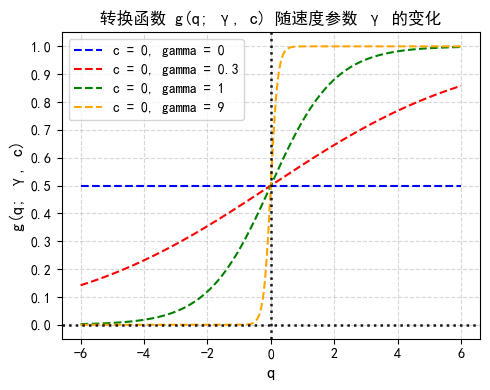

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体，例如 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Define parameters
c = 0
gamma_values = [0, 0.3, 1, 9]  # gamma values
x = np.linspace(-6, 6, 500)  # x-axis range

# Define the sigmoid function
def sigmoid(x, gamma, c):
    return (1 + np.exp(-gamma * (x - c))) ** -1

# Plot the functions for different gamma values
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green', 'orange']  # Colors for each gamma
labels = [f"c = {c}, gamma = {gamma}" for gamma in gamma_values]

for gamma, color, label in zip(gamma_values, colors, labels):
    y = sigmoid(x, gamma, c)
    plt.plot(x, y, label=label, color=color, linestyle='--')  # Dashed line for functions

# Add horizontal and vertical lines
plt.axhline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # Vertical line at x=0

# Add labels, title, and legend
plt.title("转换函数 g(q; γ, c) 随速度参数 γ 的变化", fontsize=12)
plt.xlabel("q", fontsize=12)
plt.ylabel("g(q; γ, c)", fontsize=12)
plt.xticks(np.arange(-6, 7, 2))  # Custom x-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))  # Custom y-axis ticks
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better visualization

# Show the plot
plt.tight_layout()
plt.show()


### 位置参数的含义

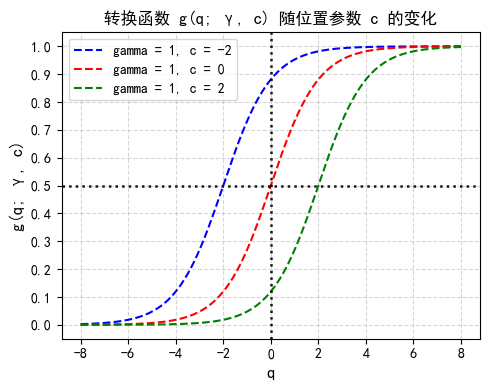

In [10]:
import numpy as np
from matplotlib import rcParams

import matplotlib.pyplot as plt

# 设置支持中文的字体，例如 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义参数
gamma = 1
c_values = [-2, 0, 2]  # c 的不同取值
x = np.linspace(-8, 8, 500)  # x 轴范围

# 定义 sigmoid 函数
def sigmoid(x, gamma, c):
    return (1 + np.exp(-gamma * (x - c))) ** -1

# 绘制不同 c 值的曲线
plt.figure(figsize=(5, 4))
colors = ['blue', 'red', 'green']  # 每个 c 值对应的颜色
labels = [f"gamma = {gamma}, c = {c}" for c in c_values]

for c, color, label in zip(c_values, colors, labels):
    y = sigmoid(x, gamma, c)
    plt.plot(x, y, label=label, color=color, linestyle='--')  # 使用虚线绘制曲线

# 添加水平线和垂直线
plt.axhline(0.5, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # 水平线 y=0.5
plt.axvline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # 垂直线 x=0

# 添加标题、标签和图例
plt.title("转换函数 g(q; γ, c) 随位置参数 c 的变化", fontsize=12)
plt.xlabel("q", fontsize=12)
plt.ylabel("g(q; γ, c)", fontsize=12)
plt.xticks(np.arange(-8, 9, 2))  # 自定义 x 轴刻度
plt.yticks(np.arange(0, 1.1, 0.1))  # 自定义 y 轴刻度
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线

# 显示图形
plt.tight_layout()
plt.show()

## 估计方法

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 定义平滑转换函数（逻辑函数）
def smooth_transition(x, gamma, c):
    return 1 / (1 + np.exp(-gamma * (x - c)))

# 定义平滑转换模型
def panel_smooth_transition_model(params, X, Y, Z):
    beta1, beta2, gamma, c = params
    transition = smooth_transition(Z, gamma, c)
    y_pred = beta1 * X + beta2 * X * transition
    return np.sum((Y - y_pred) ** 2)  # 最小化残差平方和

# 示例数据，加入个体固定效应和时间固定效应
np.random.seed(42)
N, T = 100, 10  # 面板数据的个体数和时间点
individual_effects = np.random.normal(0, 0.5, N)  # 个体固定效应
time_effects = np.random.normal(0, 0.2, T)  # 时间固定效应

X = np.random.rand(N * T)
Z = np.random.rand(N * T)

# 构造 Y，加入个体固定效应和时间固定效应
Y = (
    2 * X
    + 3 * X * smooth_transition(Z, 5, 0.5)
    + np.repeat(individual_effects, T)
    + np.tile(time_effects, N)
    + np.random.normal(0, 0.1, N * T)
)

# 初始参数
initial_params = [1, 1, 1, 0.5]

# 优化
result = minimize(panel_smooth_transition_model, 
                  initial_params, 
                  args=(X, Y, Z), 
                  method='L-BFGS-B')

beta1, beta2, gamma, c = result.x

print(f"Estimated parameters: beta1={beta1}, beta2={beta2}, gamma={gamma}, c={c}")

Estimated parameters: beta1=1.9821785851828573, beta2=3.0285019244192566, gamma=4.886915582203641, c=0.49800786495800237
